In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
%matplotlib inline

In [2]:
m_df = pd.read_csv("/Users/tural/Datasets/ml-20m/movies.csv")
m_df.set_index("movieId", inplace=True)
m_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [3]:
r_df = pd.read_csv("/Users/tural/Datasets/ml-20m/ratings.csv")
r_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


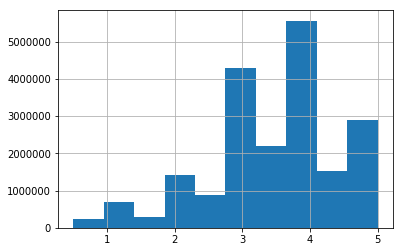

In [4]:
r_df.rating.hist()

In [5]:
rating_per_user = r_df.userId.value_counts()
rating_per_user.min(), rating_per_user.max()

(20, 9254)

In [6]:
rating_per_movie = r_df.movieId.value_counts()
rating_per_movie.min(), rating_per_movie.max()

(1, 67310)

## Popularity

In [7]:
for movie_id, score in rating_per_movie.head(10).iteritems():
    print(m_df.loc[movie_id].title, ":", score)

Pulp Fiction (1994) : 67310
Forrest Gump (1994) : 66172
Shawshank Redemption, The (1994) : 63366
Silence of the Lambs, The (1991) : 63299
Jurassic Park (1993) : 59715
Star Wars: Episode IV - A New Hope (1977) : 54502
Braveheart (1995) : 53769
Terminator 2: Judgment Day (1991) : 52244
Matrix, The (1999) : 51334
Schindler's List (1993) : 50054


## А каких годов у нас фильмы?

In [8]:
def _get_year(title):
    par_pos = title.rfind("(")
    try:
        year = int(title[(par_pos + 1): (par_pos + 5)])
    except:
        year = None
        print(title)
    return year
    
m_df["ReleaseYear"] = m_df.title.apply(_get_year)

Babylon 5
Millions Game, The (Das Millionenspiel)
Bicycle, Spoon, Apple (Bicicleta, cullera, poma)
Brazil: In the Shadow of the Stadiums
Slaying the Badger
Tatort: Im Schmerz geboren
National Theatre Live: Frankenstein
The Court-Martial of Jackie Robinson
In Our Garden
Stephen Fry In America - New World
Two: The Story of Roman & Nyro
Li'l Quinquin
A Year Along the Abandoned Road
Body/Cialo
Polskie gówno
The Third Reich: The Rise & Fall
My Own Man
Moving Alan
Michael Laudrup - en Fodboldspiller


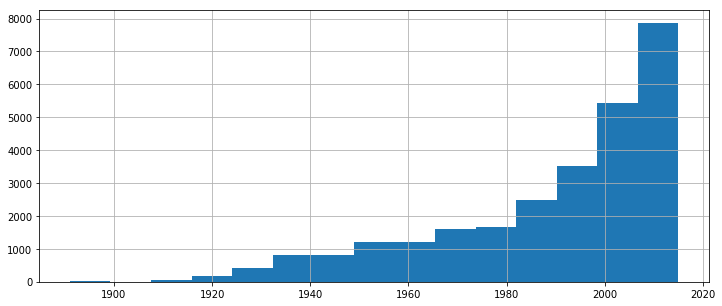

In [9]:
plt.figure(figsize=(12, 5))
m_df.ReleaseYear.hist(bins=15)

In [10]:
m_df.ReleaseYear.min(), m_df.ReleaseYear.max()

(1891.0, 2015.0)

## Старый фильм == бОльшая популярность?

In [11]:
m_df["nRatings"] = m_df.apply(lambda x: rating_per_movie.get(x.name, 0), axis=1)

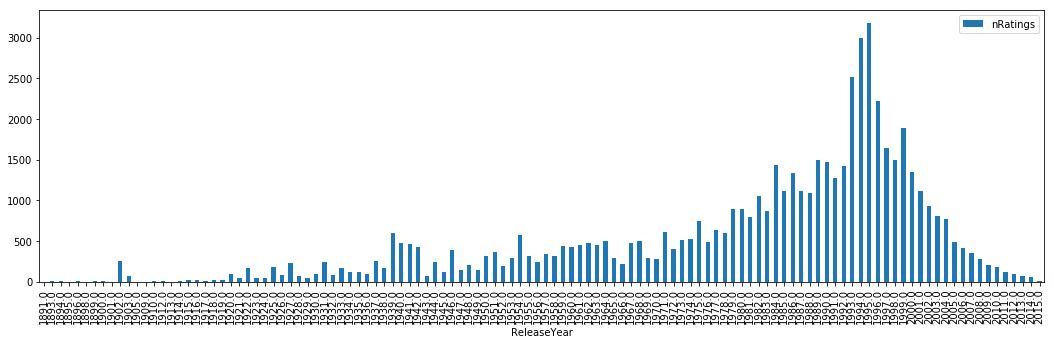

In [12]:
m_df[["ReleaseYear", "nRatings"]].dropna().groupby("ReleaseYear").mean().plot(kind='bar', figsize=(18, 5))

## Нормализация по количесту лет

In [13]:
max_year = m_df.ReleaseYear.max()
max_year

2015.0

In [14]:
normalized_n_ratings = m_df \
    .dropna(subset=["ReleaseYear"]) \
    .apply(lambda x: x.nRatings / (max_year - x.ReleaseYear + 1), axis=1) \
    .sort_values(ascending=False) \
    .head(10)

In [15]:
for movie_id, score in normalized_n_ratings.iteritems():
    print(m_df.loc[movie_id].title, ":", score)

Pulp Fiction (1994) : 3059.54545455
Matrix, The (1999) : 3019.64705882
Forrest Gump (1994) : 3007.81818182
Shawshank Redemption, The (1994) : 2880.27272727
American Beauty (1999) : 2646.29411765
Jurassic Park (1993) : 2596.30434783
Braveheart (1995) : 2560.42857143
Dark Knight, The (2008) : 2554.75
Silence of the Lambs, The (1991) : 2531.96
Lord of the Rings: The Fellowship of the Ring, The (2001) : 2503.53333333


In [16]:
for movie_id, score in rating_per_movie.head(10).iteritems():
    print(m_df.loc[movie_id].title, ":", score)

Pulp Fiction (1994) : 67310
Forrest Gump (1994) : 66172
Shawshank Redemption, The (1994) : 63366
Silence of the Lambs, The (1991) : 63299
Jurassic Park (1993) : 59715
Star Wars: Episode IV - A New Hope (1977) : 54502
Braveheart (1995) : 53769
Terminator 2: Judgment Day (1991) : 52244
Matrix, The (1999) : 51334
Schindler's List (1993) : 50054


## Trendy

In [17]:
recent_movies = m_df[m_df.ReleaseYear >= 2010][["title", "nRatings"]].sort_values("nRatings", ascending=False)
for t in recent_movies.head(10).itertuples():
    print(t.title, ":", t.nRatings)

Inception (2010) : 14023
Shutter Island (2010) : 5930
Toy Story 3 (2010) : 5781
King's Speech, The (2010) : 5629
Black Swan (2010) : 5287
Social Network, The (2010) : 5264
Avengers, The (2012) : 4959
Kick-Ass (2010) : 4774
Dark Knight Rises, The (2012) : 4770
How to Train Your Dragon (2010) : 4761


## Средний рейтинг

In [18]:
avg_rating_per_movie = r_df[["movieId", "rating"]].groupby("movieId").rating.mean().sort_values(ascending=False)

In [19]:
for movie_id, score in avg_rating_per_movie.head(10).iteritems():
    print(m_df.loc[movie_id].title, ":", score)

Divorce (1945) : 5.0
Summer Wishes, Winter Dreams (1973) : 5.0
The Beautiful Story (1992) : 5.0
Sierra, La (2005) : 5.0
A Night for Dying Tigers (2010) : 5.0
The House on 56th Street (1933) : 5.0
Such Hawks Such Hounds (2008) : 5.0
Story of Science, The (2010) : 5.0
De la servitude moderne (2009) : 5.0
Small Roads (2011) : 5.0


### Посмотрим на количество рейтингов

In [20]:
for movie_id, score in avg_rating_per_movie.head(10).iteritems():
    m = m_df.loc[movie_id]
    print(m.title, "(%s)" % m.nRatings)

Divorce (1945) (1)
Summer Wishes, Winter Dreams (1973) (1)
The Beautiful Story (1992) (1)
Sierra, La (2005) (1)
A Night for Dying Tigers (2010) (1)
The House on 56th Street (1933) (1)
Such Hawks Such Hounds (2008) (1)
Story of Science, The (2010) (1)
De la servitude moderne (2009) (1)
Small Roads (2011) (1)


# Ассоциации

Простая ассоциация:
$$A(x ,y) = \frac{|X \cap Y|}{|X|}$$

* x, y - фильмы
* X - пользователи, которые посмотрели x
* Y - пользователи, которые посмотрели y

In [21]:
print(r_df.movieId.min(), r_df.movieId.max(), r_df.movieId.unique().size)
print(r_df.userId.min(), r_df.userId.max(), r_df.userId.unique().size)

1 131262 26744
1 138493 138493


In [22]:
def get_iu_data():
    rows = []
    cols = []

    iid_to_row = {}
    uid_to_col = {}

    for t in r_df.itertuples():
        row_id = iid_to_row.setdefault(t.movieId, len(iid_to_row))
        col_id = uid_to_col.setdefault(t.userId, len(uid_to_col))

        rows.append(row_id)
        cols.append(col_id)

    m = csr_matrix((np.ones(len(rows)), (rows, cols)))
    return m, iid_to_row, uid_to_col

iu_m, iid_to_row, uid_to_col = get_iu_data()

In [23]:
m = None

In [24]:
assert np.all(iu_m.data == 1)

In [25]:
print("Shape:", iu_m.shape)
print("Density:", iu_m.nnz / (iu_m.shape[0] * iu_m.shape[1]))

Shape: (26744, 138493)
Density: 0.0053998478135544505


In [26]:
m_df[m_df.ReleaseYear == 2013].sort_values("nRatings", ascending=False).head(20)

,title,genres,ReleaseYear,nRatings
movieId,,,,
104841,Gravity (2013),Action|Sci-Fi|IMAX,2013.0,2475
106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,2013.0,2031
102445,Star Trek Into Darkness (2013),Action|Adventure|Sci-Fi|IMAX,2013.0,1971
106487,"Hunger Games: Catching Fire, The (2013)",Action|Adventure|Sci-Fi|IMAX,2013.0,1873
102125,Iron Man 3 (2013),Action|Sci-Fi|Thriller|IMAX,2013.0,1862
106920,Her (2013),Drama|Romance|Sci-Fi,2013.0,1800
106489,"Hobbit: The Desolation of Smaug, The (2013)",Adventure|Fantasy|IMAX,2013.0,1645
106916,American Hustle (2013),Crime|Drama,2013.0,1199
106696,Frozen (2013),Adventure|Animation|Comedy|Fantasy|Musical|Rom...,2013.0,1164


In [27]:
target_iid = 106100 # Dallas Buyers Club (2013)

In [28]:
i_row = iu_m[iid_to_row[target_iid]]
i_row.nnz

1020

In [29]:
X_and_Y = i_row.dot(iu_m.T).todense().A1
A_x_y = X_and_Y / i_row.nnz
A_x_y

array([ 0.35686275,  0.15784314,  0.5872549 , ...,  0.00098039,
        0.        ,  0.        ])

In [30]:
# индекс из строк в идентификаторы фильма
row_to_iid = {row: iid for iid, row in iid_to_row.items()}

In [31]:
for row_id in np.argsort(A_x_y)[::-1][:10]:
    movie_id = row_to_iid[row_id]
    score = A_x_y[row_id]
    print(m_df.loc[movie_id].title, ":", score)

Dallas Buyers Club (2013) : 1.0
Inception (2010) : 0.855882352941
Shawshank Redemption, The (1994) : 0.849019607843
Fight Club (1999) : 0.848039215686
Matrix, The (1999) : 0.848039215686
Pulp Fiction (1994) : 0.829411764706
Dark Knight, The (2008) : 0.816666666667
Lord of the Rings: The Fellowship of the Ring, The (2001) : 0.800980392157
Forrest Gump (1994) : 0.799019607843
American Beauty (1999) : 0.779411764706


In [32]:
for movie_id, score in rating_per_movie.head(10).iteritems():
    print(m_df.loc[movie_id].title, ":", score)

Pulp Fiction (1994) : 67310
Forrest Gump (1994) : 66172
Shawshank Redemption, The (1994) : 63366
Silence of the Lambs, The (1991) : 63299
Jurassic Park (1993) : 59715
Star Wars: Episode IV - A New Hope (1977) : 54502
Braveheart (1995) : 53769
Terminator 2: Judgment Day (1991) : 52244
Matrix, The (1999) : 51334
Schindler's List (1993) : 50054


### Т.е. много популярного контента

#  Привлекательность

$$A(x ,y) = \frac{|X \cap Y| / |X|}{|!X \cap Y| / |!X|}$$

* x, y - фильмы
* X - пользователи, которые посмотрели x
* !X - пользователи, которые не посмотрели x
* Y - пользователи, которые посмотрели y

In [33]:
i_row

<1x138493 sparse matrix of type '<class 'numpy.float64'>'
	with 1020 stored elements in Compressed Sparse Row format>

Если мы будем искать $!X \cap Y$ в лоб, то получим очень плотную матрицу. Мы хотим этого избежать.

In [34]:
not_X_and_Y = (iu_m - iu_m.multiply(i_row)).sum(axis=1).A1
not_X_and_Y.shape

(26744,)

In [35]:
not_X = iu_m.shape[1] - i_row.nnz

In [36]:
At_x_y = (X_and_Y / i_row.nnz) / (not_X_and_Y / not_X)
At_x_y[np.isinf(At_x_y)] = 0

/Users/tural/.virtualenvs/P3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [38]:
for row_id in np.argsort(At_x_y)[::-1][:10]:
    movie_id = row_to_iid[row_id]
    score = At_x_y[row_id]
    print(m_df.loc[movie_id].title, ":", score)

Land Ho! (2014) : 1347.7745098
Small Town Murder Songs (2010) : 1078.21960784
Gasland Part II (2013) : 1078.21960784
This is Martin Bonner (2013) : 943.442156863
Love Is Strange (2014) : 898.516339869
Honey, We Shrunk Ourselves (1997) : 808.664705882
Simon Killer (2012)  : 808.664705882
V/H/S: Viral (2014) : 808.664705882
Rudderless (2014) : 808.664705882
Starry Eyes (2014) : 808.664705882
